In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from l5kit_conflict.analysis.post_process import load_l5kit_potential_conflicts


np.set_printoptions(suppress=True)
plt.style.use("ggplot")

np.set_printoptions(suppress=True)
plt.style.use("ggplot")

D:\github\lyft_intersection\l5kit\l5kit\l5kit\dataset\select_agents.py:31: UserWarning: Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows.However, writing the mask with this config may be inconsistent.
  warnings.warn(


In [5]:
AVHV_potential_conflict_dataset, HVHV_potential_conflict_dataset = load_l5kit_potential_conflicts()

1> Loading pickle files ...
HVHV dataset #samples: 739
AVHV dataset #samples: 678
2> Removing unnecessary conflicts ...
HVHV dataset #samples: 608
AVHV dataset #samples: 508
3> Removing AVHV conflicts with non-continuous AV trajectories ...
HVHV dataset #samples: 608
AVHV dataset #samples: 479
4> Post-processing the complex potential conflicts ...
HVHV dataset #samples: 459
AVHV dataset #samples: 400


In [6]:
# %%time

truncate = False
n_frames_truncated = 10
#############################################################

print("[1/2] Calculating indictors based on HVHV dataset ...")

HVHV_MaxReqDecs, HVHV_MeanReqDecs = [], []

for conflict in tqdm(HVHV_potential_conflict_dataset):

    is_success, req_decs = conflict.req_dec(truncate, n_frames_truncated)
    
    if is_success:
        HVHV_MaxReqDecs.append(np.max(req_decs))
        HVHV_MeanReqDecs.append(np.mean(req_decs))
    else:
        continue
        
##############################################################

print("[2/2] Calculating indictors based on AVHV dataset ...")

AVHV_MaxReqDecs, HVAV_MaxReqDecs = [], []
AVHV_MeanReqDecs, HVAV_MeanReqDecs = [], []

for conflict in tqdm(AVHV_potential_conflict_dataset):

    is_success, req_decs = conflict.req_dec(truncate, n_frames_truncated)
    
    if is_success:
        PET = conflict.PET
        # first_conflict_speed = conflict.first_veh_speed_at_conflict
        # second_conflic_speed = conflict.second_veh_speed_at_conflict
        # first_veh_average_speed = conflict.first_veh_average_speed
        # second_veh_average_speed = conflict.second_veh_average_speed
        if conflict.is_first_AV:
            # AVHV_PETs.append(PET)
            # AVHV_leader_vs.append(first_conflict_speed)
            # AVHV_follower_vs.append(second_conflic_speed)
            # AVHV_leader_average_vs.append(first_veh_average_speed)
            # AVHV_follower_average_vs.append(second_veh_average_speed)
            AVHV_MaxReqDecs.append(np.max(req_decs))
            AVHV_MeanReqDecs.append(np.mean(req_decs))
            
        else:
            # HVAV_PETs.append(PET)
            # HVAV_leader_vs.append(first_conflict_speed)
            # HVAV_follower_vs.append(second_conflic_speed)
            # HVAV_leader_average_vs.append(first_veh_average_speed)
            # HVAV_follower_average_vs.append(second_veh_average_speed)
            HVAV_MaxReqDecs.append(np.max(req_decs))
            HVAV_MeanReqDecs.append(np.mean(req_decs))
    else:
        continue

[1/2] Calculating indictors based on HVHV dataset ...


100%|██████████████████████████████████████████████████████| 459/459 [00:01<00:00, 275.13it/s]


[2/2] Calculating indictors based on AVHV dataset ...


  0%|                                                                 | 0/400 [00:00<?, ?it/s]D:\github\lyft_intersection\extract_intersections\l5kit_conflict\analysis\conflict.py:204: RuntimeWarning: invalid value encountered in scalar divide
  req_dec = 0.5 * second_speed**2 / len_second_traj
100%|██████████████████████████████████████████████████████| 400/400 [00:02<00:00, 168.89it/s]


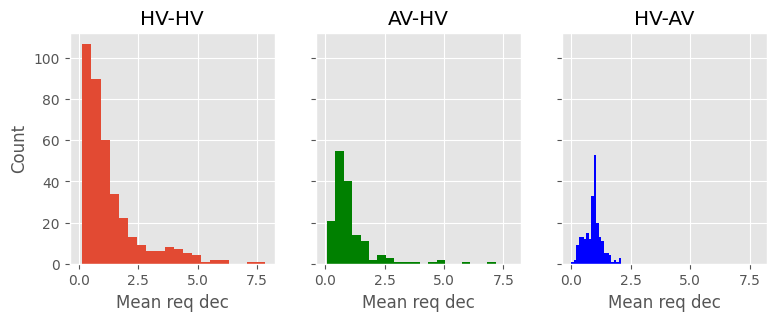

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, sharex=True)

bins=20

hist00 = axs[0].hist(x=HVHV_MeanReqDecs, bins=bins)
hist01 = axs[1].hist(x=AVHV_MeanReqDecs, bins=bins, color='green')
hist01 = axs[2].hist(x=HVAV_MeanReqDecs, bins=bins, color='blue')

axs[0].set_title("HV-HV")
axs[1].set_title("AV-HV")
axs[2].set_title("HV-AV")

axs[0].set_xlabel("Mean req dec")
axs[1].set_xlabel("Mean req dec")
axs[2].set_xlabel("Mean req dec")

axs[0].set_ylabel("Count")

plt.show()

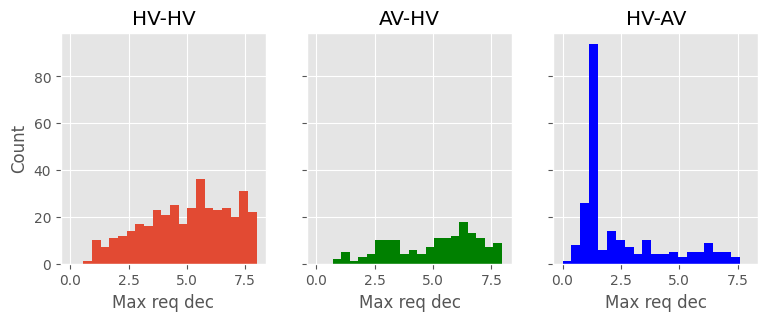

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, sharex=True)

bins=20

hist00 = axs[0].hist(x=HVHV_MaxReqDecs, bins=bins)
hist01 = axs[1].hist(x=AVHV_MaxReqDecs, bins=bins, color='green')
hist01 = axs[2].hist(x=HVAV_MaxReqDecs, bins=bins, color='blue')

axs[0].set_title("HV-HV")
axs[1].set_title("AV-HV")
axs[2].set_title("HV-AV")

axs[0].set_xlabel("Max req dec")
axs[1].set_xlabel("Max req dec")
axs[2].set_xlabel("Max req dec")

axs[0].set_ylabel("Count")

plt.show()

In [91]:
# # %% collect required decelerations
# truncate = True
# n_frames = 30

# HVHV_RDs = []
# AVHV_RDs = []
# HVAV_RDs = []
# HVHV_RDs_merge = []
# AVHV_RDs_merge = []
# HVAV_RDs_merge = []
# HVHV_RDs_cross = []
# AVHV_RDs_cross = []
# HVAV_RDs_cross = []

# HVHV_MRDs = []
# AVHV_MRDs = []
# HVAV_MRDs = []
# HVHV_MRDs_merge = []
# AVHV_MRDs_merge = []
# HVAV_MRDs_merge = []
# HVHV_MRDs_cross = []
# AVHV_MRDs_cross = []
# HVAV_MRDs_cross = []

# for index, conflict in enumerate(conflicts):
#     # concatenate xy and t as a trajectory ndarray with shape (N, 3)
#     first_xyt = np.hstack(
#         [conflict.first_trajectory.xy, conflict.first_trajectory.t.reshape((-1,1))])
#     second_xyt = np.hstack(
#         [conflict.second_trajectory.xy, conflict.second_trajectory.t.reshape((-1,1))])
    
#     # extract the trajectory within the study rectangle
#     first_xyt = first_xyt[
#         (first_xyt[:, 0] <= Trajectory.X_MAX) &
#         (first_xyt[:, 0] >= Trajectory.X_MIN) &
#         (first_xyt[:, 1] <= Trajectory.Y_MAX) &
#         (first_xyt[:, 1] >= Trajectory.Y_MIN)
#     ]
#     second_xyt = second_xyt[
#         (second_xyt[:, 0] <= Trajectory.X_MAX) &
#         (second_xyt[:, 0] >= Trajectory.X_MIN) &
#         (second_xyt[:, 1] <= Trajectory.Y_MAX) &
#         (second_xyt[:, 1] >= Trajectory.Y_MIN)
#     ]
    
#     # take the first timestamp that two vehicles co-exist
#     coexist_start_time = max(first_xyt[0, 2], second_xyt[0, 2])
#     first_xyt = first_xyt[
#         (conflict.first_time_at_conflict > first_xyt[:, 2]) &
#         (first_xyt[:, 2] >= coexist_start_time)
#         ]    
#     second_xyt = second_xyt[
#         (conflict.first_time_at_conflict > second_xyt[:, 2]) &
#         (second_xyt[:, 2] >= coexist_start_time)
#         ]

#     if truncate:
#         # if first_xyt.shape[0] > n_frames:
#         #     first_xyt = first_xyt[n_frames:,]
#         # else: 
#         #     continue
#         if second_xyt.shape[0] > n_frames:
#             second_xyt = second_xyt[n_frames:,]
#         else:
#             continue
            
#     if first_xyt.shape[0] !=  second_xyt.shape[0]:
#         print("Non-equal two trajectories", first_xyt.shape, second_xyt.shape)
#         len_traj = min(first_xyt.shape[0], second_xyt.shape[0]) - 2
#     else:
#         len_traj = first_xyt.shape[0] - 2      

#     if len_traj == 0:
#         continue
    
#     RDs = []
#     for jdx in range(len_traj):
#         # calculate the RD and Max RD for the second vehicle
#         len_second_traj = LineString(second_xyt[jdx:, :2]).length
#         second_speed = three_sigma_smoothing(compute_position_based_velocities(second_xyt[jdx:jdx+3, :2]))[0]
#         RD = 0.5 * second_speed**2 / len_second_traj
#         RDs.append(RD)
        
#         if conflict.is_first_AV:
#             AVHV_RDs.append(RD)
#             if conflict.category == "merge":
#                 AVHV_RDs_merge.append(RD)
#             else:
#                 AVHV_RDs_cross.append(RD)
#         else:
#             HVAV_RDs.append(RD)
#             if conflict.category == "merge":
#                 HVAV_RDs_merge.append(RD)
#             else:
#                 HVAV_RDs_cross.append(RD)
    
#     if len(RDs) == 0:
#         continue
#     RDs = np.array(RDs)
#     RDs = RDs[RDs <= 8]
#     if RDs.size > 0:
#         MRD = np.mean(RDs) # np.max(RDs)
#         if conflict.is_first_AV:
#             AVHV_MRDs.append(MRD)
#             if conflict.category == "merge":
#                 AVHV_MRDs_merge.append(MRD)
#             else:
#                 AVHV_MRDs_cross.append(MRD)
#         else:
#             HVAV_MRDs.append(MRD)
#             if conflict.category == "merge":
#                 HVAV_MRDs_merge.append(MRD)
#             else:
#                 HVAV_MRDs_cross.append(MRD)


# AVHV_RDs = np.array(AVHV_RDs)
# HVAV_RDs = np.array(HVAV_RDs)
# AVHV_RDs_merge = np.array(AVHV_RDs_merge)
# HVAV_RDs_merge = np.array(HVAV_RDs_merge)
# AVHV_RDs_cross = np.array(AVHV_RDs_cross)
# HVAV_RDs_cross = np.array(HVAV_RDs_cross)

# AVHV_MRDs = np.array(AVHV_MRDs)
# HVAV_MRDs = np.array(HVAV_MRDs)
# AVHV_MRDs_merge = np.array(AVHV_MRDs_merge)
# HVAV_MRDs_merge = np.array(HVAV_MRDs_merge)
# AVHV_MRDs_cross = np.array(AVHV_MRDs_cross)
# HVAV_MRDs_cross = np.array(HVAV_MRDs_cross)

# RD_MIN = 0
# RD_MAX = 8

# AVHV_RDs = AVHV_RDs[
#     (AVHV_RDs > RD_MIN) &
#     (AVHV_RDs <= RD_MAX)
# ]

# HVAV_RDs = HVAV_RDs[
#     (HVAV_RDs > RD_MIN) &
#     (HVAV_RDs <= RD_MAX)
# ]

# AVHV_RDs_merge = AVHV_RDs_merge[
#     (AVHV_RDs_merge > RD_MIN) &
#     (AVHV_RDs_merge <= RD_MAX)
# ]
# HVAV_RDs_merge = HVAV_RDs_merge[
#     (HVAV_RDs_merge > RD_MIN) &
#     (HVAV_RDs_merge <= RD_MAX)
# ]

# AVHV_RDs_cross = AVHV_RDs_cross[
#     (AVHV_RDs_cross > RD_MIN) &
#     (AVHV_RDs_cross <= RD_MAX)
# ]
# HVAV_RDs_cross = HVAV_RDs_cross[
#     (HVAV_RDs_cross > RD_MIN) &
#     (HVAV_RDs_cross <= RD_MAX)
# ]

Non-equal two trajectories (96, 3) (116, 3)


C:\Users\Gavin\AppData\Local\Temp\ipykernel_21072\45460137.py:81: RuntimeWarning: invalid value encountered in scalar divide
  RD = 0.5 * second_speed**2 / len_second_traj


Non-equal two trajectories (131, 3) (109, 3)
Non-equal two trajectories (122, 3) (146, 3)


Max/Mean req dec

0.6672362592579283 0.8022890102078624
0.4344167895526903 0.9046048049675797
0.5482810716775611 0.8532154160979777
1.1570331744917859 0.8526491560159569
0.8776956823100477 1.1161868829492774
1.0276678604895875 0.9668760345629068


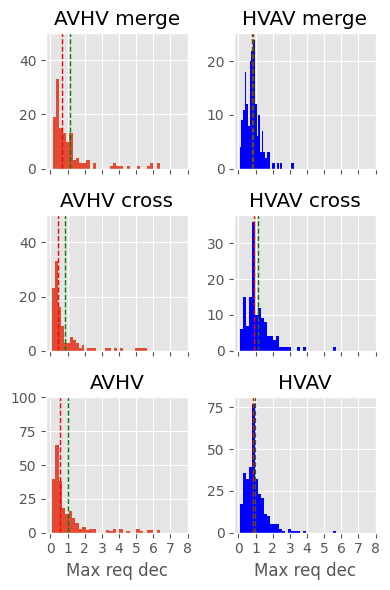

In [100]:
# bins = 32

# # %% draw distribution
# fig, axs = plt.subplots(3, 2, figsize=(4, 6), sharey=False, sharex=True)

# hist00 = axs[0, 0].hist(x=AVHV_MRDs_merge, bins=bins)
# hist01 = axs[0, 1].hist(x=HVAV_MRDs_merge, bins=bins, color='blue')
# hist10 = axs[1, 0].hist(x=AVHV_MRDs_cross, bins=bins)
# hist11 = axs[1, 1].hist(x=HVAV_MRDs_cross, bins=bins, color='blue')
# hist20 = axs[2, 0].hist(x=AVHV_MRDs, bins=bins)
# hist21 = axs[2, 1].hist(x=HVAV_MRDs, bins=bins, color='blue')

# print(np.median(AVHV_MRDs_merge), np.median(HVAV_MRDs_merge))
# print(np.median(AVHV_MRDs_cross), np.median(HVAV_MRDs_cross))
# print(np.median(AVHV_MRDs), np.median(HVAV_MRDs))

# print(np.mean(AVHV_MRDs_merge), np.mean(HVAV_MRDs_merge))
# print(np.mean(AVHV_MRDs_cross), np.mean(HVAV_MRDs_cross))
# print(np.mean(AVHV_MRDs), np.mean(HVAV_MRDs))

# axs[0, 0].axvline(np.median(AVHV_MRDs_merge), color='red', linestyle='dashed', linewidth=1, label='Median')
# axs[0, 1].axvline(np.median(HVAV_MRDs_merge), color='red', linestyle='dashed', linewidth=1, label='Median')
# axs[1, 0].axvline(np.median(AVHV_MRDs_cross), color='red', linestyle='dashed', linewidth=1, label='Median')
# axs[1, 1].axvline(np.median(HVAV_MRDs_cross), color='red', linestyle='dashed', linewidth=1, label='Median')
# axs[2, 0].axvline(np.median(AVHV_MRDs), color='red', linestyle='dashed', linewidth=1, label='Median')
# axs[2, 1].axvline(np.median(HVAV_MRDs), color='red', linestyle='dashed', linewidth=1, label='Median')

# axs[0, 0].axvline(np.mean(AVHV_MRDs_merge), color='green', linestyle='dashed', linewidth=1, label='Mean')
# axs[0, 1].axvline(np.mean(HVAV_MRDs_merge), color='green', linestyle='dashed', linewidth=1, label='Mean')
# axs[1, 0].axvline(np.mean(AVHV_MRDs_cross), color='green', linestyle='dashed', linewidth=1, label='Mean')
# axs[1, 1].axvline(np.mean(HVAV_MRDs_cross), color='green', linestyle='dashed', linewidth=1, label='Mean')
# axs[2, 0].axvline(np.mean(AVHV_MRDs), color='green', linestyle='dashed', linewidth=1, label='Mean')
# axs[2, 1].axvline(np.mean(HVAV_MRDs), color='green', linestyle='dashed', linewidth=1, label='Mean')

# axs[0, 0].set_title("AVHV merge")
# axs[0, 1].set_title("HVAV merge")
# axs[1, 0].set_title("AVHV cross")
# axs[1, 1].set_title("HVAV cross")
# axs[2, 0].set_title("AVHV")
# axs[2, 1].set_title("HVAV")

# axs[2, 0].set_xlabel("Mean req dec")
# axs[2, 1].set_xlabel("Mean req dec")

# # axs[0, 0].set_ylabel("Count")
# axs[0, 0].set_ylim([0, 50])
# axs[1, 0].set_ylim([0, 50])
# axs[2, 0].set_ylim([0, 100])
# axs[2, 1].set_xticks(np.arange(9))

# plt.tight_layout()
# plt.show()

Req dec

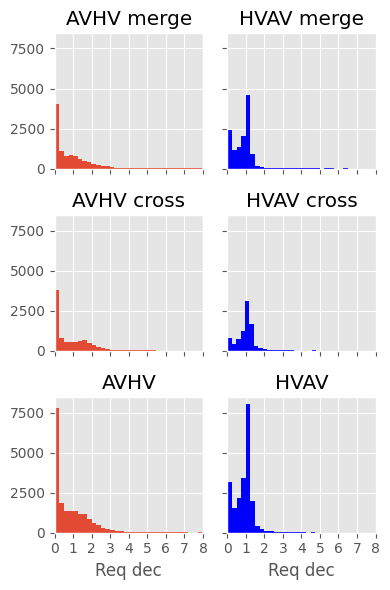

In [54]:
# bins = 32

# # %% draw distribution
# fig, axs = plt.subplots(3, 2, figsize=(4, 6), sharey=True, sharex=True)

# hist00 = axs[0, 0].hist(x=AVHV_RDs_merge, bins=bins)
# hist01 = axs[0, 1].hist(x=HVAV_RDs_merge, bins=bins, color='blue')
# hist10 = axs[1, 0].hist(x=AVHV_RDs_cross, bins=bins)
# hist11 = axs[1, 1].hist(x=HVAV_RDs_cross, bins=bins, color='blue')
# hist20 = axs[2, 0].hist(x=AVHV_RDs, bins=bins)
# hist21 = axs[2, 1].hist(x=HVAV_RDs, bins=bins, color='blue')

# axs[0, 0].set_title("AVHV merge")
# axs[0, 1].set_title("HVAV merge")
# axs[1, 0].set_title("AVHV cross")
# axs[1, 1].set_title("HVAV cross")
# axs[2, 0].set_title("AVHV")
# axs[2, 1].set_title("HVAV")

# axs[2, 0].set_xlabel("Req dec")
# axs[2, 1].set_xlabel("Req dec")

# # axs[0, 0].set_ylabel("Count")
# axs[2, 0].set_xlim([RD_MIN, RD_MAX])
# axs[2, 1].set_xlim([RD_MIN, RD_MAX])
# axs[2, 1].set_xlim([RD_MIN, RD_MAX])
# axs[2, 1].set_xticks(np.arange(9))

# plt.tight_layout()
# plt.show()